# GETTING THE DATA READY 
I have used excel to manipulate the data into a valuable set theta i would use. Using the FactInternetSales datasets I broke it down into a suitable sustainable form.

###  CustomerKey
The customer key gives us a leeway into the DimCustomer table. from here we get 29 columns but not all will be of interest for this aanlysis. we used the VLOOKUP function in excel to get the exact geography key for every custommer based on the customerkey. The CustomerAlternateKey	Title	FirstName	MiddleName	LastName	NameStyle columns re not that necesary for this analysis incomparison to the content they store. we have an interest in sales  and everything feasible about the sales and customers. The birthdate will be important in geting the customers age rane and understand the buying patterns of different agegroups. Gender is also important in understanding what goods are common among diferent genders. Email adress are not necesary for analysis. YearlyIncome	TotalChildren	NumberChildrenAtHome are all important to understand customers buying the specific goods and know how the number of children will affect the buuying patterns and what they will buy.EnglishEducation will help us understanding the buying behavour based on the level of education. HouseOwnerFlag	NumberCarsOwned CommuteDistance are also eseantial in this analysis as they will prob further understandingt he buying pattersn based on cars owned and if the disytance has a significant affect on buying behavior. from the DimCustomer table we  will only pick thee mentioned tables.

###  ProductKey
the Product key gives as an insight into the dimProduct data. from this data we only get the actual products name so that we can have an exact product names instead of product keys. in this we also use the VLOOKUP function to get the ecact key along with its name onto the FactinternetSales data.

### DimProductSubcategoryKey
This gives us the leeway to  DimProductSubcategory dataset where we get the subcategory names of each datasset into our datset.

###   DimSalesTerritoryKey

DimSalesTerritoryKey allows for the matching of data in the DimSalesTerritory data and get the Teritory names for each teritory location.

###     geography key
this key points us to DimGeography where we  get cityy country and locations in general of the customers.

###   CurrencyKey

DimCurrency is directe related to this key where we get curency name used instead of  having the curency keys.

     -  **these are the datasets chosen with their respective columns. these tables are merged into the FactinternetSales data table**

###   SalesTerritoryKey
this column helps in getting the sales by teritory for the sakes agenst and also get the targets set fro them in the  FactSalesTargets dataset. 

###   TABLES NOT CHOSEM
    - DimAccount helps in understanding the account types for customers which is not a point of interest in this analysis. 
    - DimDate is dates stored with weekid and names of the weeks which can still be imported from python without the need of the table being added into the dataset.
    - DimDepartmentGroup  is the departmental grouping of thedepartments in the  DimOrganization ddata.
    - DimPromotion DimReseller DimSalesReason DimScenario FactCallCenter FactCurrencyRate FactFinance 

Examining the summary statistics for the selected columns from the merged 'Geography' and 'DimCustomer' tables, I find insightful details about various customer attributes. Beginning with 'YearlyIncome,' the dataset encompasses 18,484 entries, reflecting a diverse range of annual incomes. The average yearly income stands at approximately $57,305.78, with a notable standard deviation of $32,285.84, indicating considerable variability in income levels.

Moving on to family-related attributes, 'TotalChildren' showcases an average of 1.84 children per customer, while 'NumberChildrenAtHome' indicates an average of about 1.00 child residing at home. Both metrics exhibit some degree of variability, with customers having up to 5 children. 'HouseOwnerFlag' reveals that, on average, about 68% of customers own a house, with a minimum value of 0 indicating non-homeownership for some individuals.

Considering lifestyle indicators, 'NumberCarsOwned' illustrates that customers own an average of 1.50 cars, with some not owning any and others having up to 4 cars. Lastly, 'SalesTerritoryKey' provides insights into the distribution of sales territory keys, with an average of approximately 5.90. These metrics, each offering unique perspectives on customer characteristics, collectively contribute to a comprehensive understanding of the merged dataset, excluding 'GeographyKey' and 'CustomerKey' columns.

In [12]:
from pyspark.sql import SparkSession
import os

# Initialize a Spark session
spark = SparkSession.builder.appName("CSVLoader").getOrCreate()

# Path to the folder containing CSV files
folder_path = r'C:\Users\neste\OneDrive\Desktop\karanja\DataSet_final\DataSet_final'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create variables for each DataFrame
for csv_file in csv_files:
    # Use the file name (without extension) as the variable name
    df_name = os.path.splitext(csv_file)[0]
    # Read the CSV file into a DataFrame
    globals()[df_name] = spark.read.csv(os.path.join(folder_path, csv_file), header=True, inferSchema=True)

# Show the contents of each DataFrame
DimGeography.show()
DimAccount.show()
DimCurrency.show()
DimCustomer.show()
DimDate.show()
DimDepartmentGroup.show()
DimOrganization.show()
DimProduct.show()
DimProductCategory.show()
DimProductSubcategory.show()
DimPromotion.show()
DimReseller.show()
DimSalesReason.show()
DimSalesTerritory.show()
DimScenario.show()
FactCallCenter.show()
FactCurrencyRate.show()
FactInternetSales.show()



+------------+--------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|GeographyKey|          City|StateProvinceCode|StateProvinceName|CountryRegionCode|EnglishCountryRegionName|SpanishCountryRegionName|FrenchCountryRegionName|PostalCode|SalesTerritoryKey|IpAddressLocator|
+------------+--------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|           1|    Alexandria|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2015|                9|    198.51.100.2|
|           2| Coffs Harbour|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2450|                

# data cleaning 

here we merge the dataset into a suitable one first we get product name from the dimproduct table into the factinternetsales

from dimCustomer we get the followin columns uning the CustomerKey. GeographyKey | BirthDate MaritalStatus Gender TotalChildren NumberChildrenAtHome   EnglishEducation HouseOwnerFlag NumberCarsOwned

fromthe DimPromotion we get the EnglishPromotionName into the df.

from the dimCurency we get the CurrencyKey column whhich helps us to get the Curency names from the dimCurency table.

from dim salesTertoy we use the saleyterirorykey to join SalesTerritoryRegion	SalesTerritoryCountry	SalesTerritoryGroup columns to the df. thee following columns are droped ["GeographyKey", "SalesTerritoryKey", "CurrencyKey", "PromotionKey", "CustomerKey", "ProductKey", "OrderDateKey", "DueDateKey", "ShipDateKey", "SalesOrderNumber", "CarrierTrackingNumber", "CustomerPONumber", "OrderDate", "DueDate", "ShipDate"]

In [47]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import concat_ws, substring
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_unixtime, unix_timestamp, date_format, year, month, dayofweek
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_unixtime, unix_timestamp, year, month, dayofweek, datediff, lit

# Select only the necessary columns from DimProduct
DimProductSubset = DimProduct.select("ProductKey", "EnglishProductName")

# Perform the join based on the ProductKey column
joined_df = FactInternetSales.join(DimProductSubset, "ProductKey", "inner")


# Select only the necessary columns from DimCustomer
DimCustomerSubset = DimCustomer.select("CustomerKey", "GeographyKey", "BirthDate", "MaritalStatus",
                                       "Gender", "TotalChildren", "NumberChildrenAtHome","CommuteDistance",
                                       "EnglishEducation", "HouseOwnerFlag", "NumberCarsOwned")

# Perform the join based on the CustomerKey column and overwrite joined_df
joined_df = joined_df.join(DimCustomerSubset, "CustomerKey", "inner")
# Select only the necessary columns from DimPromotion
DimPromotionSubset = DimPromotion.select("PromotionKey", "EnglishPromotionName")

# Perform the join with DimPromotion based on the PromotionKey column
joined_df = joined_df.join(DimPromotionSubset, "PromotionKey", "inner")

# Select only the necessary columns from DimCurrency
DimCurrencySubset = DimCurrency.select("CurrencyKey", "CurrencyName")

# Perform the join with DimCurrency based on the CurrencyKey column
joined_df = joined_df.join(DimCurrencySubset, "CurrencyKey", "inner")


# Select only the necessary columns from DimSalesTerritory
DimSalesTerritorySubset = DimSalesTerritory.select("SalesTerritoryKey", "SalesTerritoryRegion", 
                                                   "SalesTerritoryCountry", "SalesTerritoryGroup")

# Perform the join with DimSalesTerritory based on the SalesTerritoryKey column
joined_df = joined_df.join(DimSalesTerritorySubset, "SalesTerritoryKey", "inner")
# Select only the necessary columns from DimGeography
DimGeographySubset = DimGeography.select("GeographyKey", "StateProvinceName", 
                                         "EnglishCountryRegionName", "City")

# Perform the join with DimGeography based on the GeographyKey column
joined_df = joined_df.join(DimGeographySubset, "GeographyKey", "inner")

# Add a "/" after the first four digits and the next two digits in OrderDateKey
joined_df = joined_df.withColumn("OrderDateKey", 
                                 concat_ws("/", 
                                            substring("OrderDateKey", 1, 4),
                                            substring("OrderDateKey", 5, 2),
                                            substring("OrderDateKey", 7, 2)))

# Convert OrderDateKey to a timestamp column
joined_df = joined_df.withColumn("OrderDate", 
                                 from_unixtime(unix_timestamp(joined_df["OrderDateKey"], "yyyy/MM/dd")))

# Extract year, month, and day of week from OrderDate
joined_df = joined_df.withColumn("OrderYear", year("OrderDate"))
joined_df = joined_df.withColumn("OrderMonth", month("OrderDate"))
joined_df = joined_df.withColumn("DayOfWeek", dayofweek("OrderDate"))

# Convert BirthDate to a timestamp column
joined_df = joined_df.withColumn("BirthDate", 
                                 from_unixtime(unix_timestamp(joined_df["BirthDate"], "yyyy-MM-dd")))

# Extract year, month, and day of week from BirthDate
joined_df = joined_df.withColumn("BirthYear", year("BirthDate"))
joined_df = joined_df.withColumn("BirthMonth", month("BirthDate"))
joined_df = joined_df.withColumn("BirthDayOfWeek", dayofweek("BirthDate"))

# Calculate age at the year 2014
current_year = 2014
joined_df = joined_df.withColumn("Age", lit(current_year) - year("BirthDate"))

# Drop the original BirthDate column if needed
joined_df = joined_df.drop("BirthDate")


# Drop specified columns
columns_to_drop = ["GeographyKey", "SalesTerritoryKey", "CurrencyKey", "PromotionKey", 
                    "CustomerKey", "ProductKey", "OrderDateKey", "DueDateKey", "ShipDateKey", 
                    "SalesOrderNumber", "CarrierTrackingNumber", "CustomerPONumber", 
                    "OrderDate", "DueDate", "ShipDate","SalesOrderLineNumber","RevisionNumber","OrderQuantity"]

joined_df = joined_df.drop(*columns_to_drop)

# Show the result
joined_df.show()

+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+--------------------+-------------+------+-------------+--------------------+---------------+-------------------+--------------+---------------+--------------------+--------------------+--------------------+---------------------+-------------------+-------------------+------------------------+-------------+---------+----------+---------+---------+----------+--------------+---+
|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|  EnglishProductName|MaritalStatus|Gender|TotalChildren|NumberChildrenAtHome|CommuteDistance|   EnglishEducation|HouseOwnerFlag|NumberCarsOwned|EnglishPromotionName|        CurrencyName|SalesTerritoryRegion|SalesTerritoryCountry|SalesTerritoryGroup|  StateProvinceName|EnglishCountryRegionName|         City|OrderYear|OrderMonth|DayOfWeek|BirthYear|BirthMonth|Birt

## mapping the data
here we mapp th e categorical value to integers mapping them to numericla values

In [37]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.types import StringType

# Specify the categorical columns to convert
categorical_columns = ["EnglishProductName", "MaritalStatus", "Gender", "CommuteDistance", 
                        "EnglishEducation", "EnglishPromotionName", "CurrencyName", 
                        "SalesTerritoryRegion", "SalesTerritoryCountry", "SalesTerritoryGroup", 
                        "StateProvinceName", "EnglishCountryRegionName", "City"]

# Create a dictionary to store the mapping of index to original values for each column
index_mapping = {}

for col_name in categorical_columns:
    # Create a StringIndexer for each categorical column
    indexer = StringIndexer(inputCol=col_name, outputCol=f"{col_name}_index", handleInvalid="keep")
    
    # Fit the indexer and transform the data
    indexed_data = indexer.fit(joined_df).transform(joined_df)
    
    # Collect unique values and their corresponding index
    index_mapping[col_name] = indexed_data.select(f"{col_name}", f"{col_name}_index").distinct()

# Show the mapping of index to original values
for col_name, mapping_df in index_mapping.items():
    print(f"Mapping for {col_name}:")
    mapping_df.show(truncate=False)


Mapping for EnglishProductName:
+--------------------------+------------------------+
|EnglishProductName        |EnglishProductName_index|
+--------------------------+------------------------+
|Long-Sleeve Logo Jersey, L|29.0                    |
|Road-250 Red, 58          |48.0                    |
|Mountain-500 Silver, 48   |113.0                   |
|Touring-1000 Blue, 60     |79.0                    |
|Touring-1000 Yellow, 60   |81.0                    |
|Mountain-500 Black, 48    |109.0                   |
|Touring-1000 Blue, 54     |74.0                    |
|Women's Mountain Shorts, M|42.0                    |
|Mountain-100 Silver, 38   |105.0                   |
|Road-550-W Yellow, 42     |49.0                    |
|Mountain-500 Black, 40    |118.0                   |
|Mountain-400-W Silver, 40 |85.0                    |
|Sport-100 Helmet, Red     |4.0                     |
|Women's Mountain Shorts, S|50.0                    |
|Road-550-W Yellow, 40     |61.0                  

# DESCREPTIVE STATISTICS

1. **SalesOrderLineNumber:**
   - This column represents the line number of each sales order.
   - In real life, it's crucial for tracking and organizing orders. Higher line numbers may indicate more items or a more complex order.

2. **RevisionNumber:**
   - All values are 1, indicating no revisions to the orders.
   - In practical terms, this suggests that the sales orders underwent no changes or modifications after initial creation.

3. **OrderQuantity:**
   - The average order quantity is 1, with a standard deviation of 0.
   - This implies that most orders consist of a single item, but some may have more. Understanding average quantities helps in inventory planning.

4. **UnitPrice:**
   - The average unit price is $486.09, with a considerable standard deviation.
   - This suggests a diverse range of products with varying prices. High standard deviation may indicate the presence of both low and high-cost items.

5. **ExtendedAmount:**
   - This column mirrors the unit price values, indicating the total amount for each order.
   - Businesses can analyze this to understand revenue patterns and identify high-value transactions.

6. **UnitPriceDiscountPct:**
   - All values are 0, indicating no unit price discounts.
   - In a real-world scenario, this could mean that the company does not typically offer discounts on unit prices.

7. **DiscountAmount:**
   - All values are 0, indicating no discounts applied.
   - Businesses may use this information to assess the effectiveness of discount strategies.

8. **ProductStandardCost:**
   - The average product standard cost is $286.07.
   - This cost data is essential for calculating profit margins, helping businesses optimize pricing strategies.

9. **TotalProductCost:**
   - Similar to the standard cost, this represents the total cost for each product in an order.
   - Analyzing this can provide insights into overall costs associated with fulfilling orders.

10. **SalesAmount:**
    - The average sales amount is $486.09, matching the average unit price.
    - This reaffirms the understanding that sales amount is influenced by unit price.

11. **TaxAmt:**
    - The average tax amount is $38.89.
    - This information is crucial for compliance and financial planning.

12. **Freight:**
    - The average freight cost is $12.15.
    - This cost is associated with shipping and logistics, impacting overall expenses.

13. **Other Columns:**
    - The summary provides statistical measures for various categorical and numerical columns, offering insights into customer demographics, education, and order details.

In conclusion, this sales data summary provides a comprehensive view of the orders, their quantities, prices, costs, and associated financial aspects. Analyzing this information can guide strategic decision-making, such as pricing adjustments, inventory management, and the optimization of discount strategies.

In [43]:
joined_df.summary().show()

+-------+--------------------+--------------+-------------+------------------+------------------+--------------------+--------------+-------------------+------------------+------------------+------------------+------------------+--------------------+-------------+------+------------------+--------------------+---------------+-------------------+-------------------+------------------+--------------------+--------------------+--------------------+---------------------+-------------------+-----------------+------------------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|SalesOrderLineNumber|RevisionNumber|OrderQuantity|         UnitPrice|    ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|  TotalProductCost|       SalesAmount|            TaxAmt|           Freight|  EnglishProductName|MaritalStatus|Gender|     TotalChildren|NumberChildrenAtHome|CommuteDistan

# VISUALIZAION
We created a barplot of the count of the content of the following columns  'EnglishProductName', 'MaritalStatus', 'Gender', 'TotalChildren', 'NumberChildrenAtHome',    'CommuteDistance', 'EnglishEducation', 'HouseOwnerFlag', 'NumberCarsOwned',     'EnglishPromotionName', 'CurrencyName', 'SalesTerritoryRegion', 'SalesTerritoryCountry',     'SalesTerritoryGroup', 'StateProvinceName', 'EnglishCountryRegionName', 'City',     'OrderYear', 'OrderMonth', 'DayOfWeek'

 `EnglishProductName`
- **Top Products:**
  - The product "Water Bottle - 30 oz." has the highest count, indicating it is a popular item with 4244 sales.
  - Other popular items include "Patch Kit/8 Patches," "Mountain Tire Tube," and "Road Tire Tube."

- **Helmet Sales:**
  - Helmets, such as "Sport-100 Helmet, Black" and "Sport-100 Helmet, Red," are also among the top-selling products.
  - This suggests a significant demand for safety gear, which could be influenced by the type of customers or specific promotions.

- **Tire Tubes:**
  - Both "Mountain Tire Tube" and "Road Tire Tube" are well-represented in the top products, indicating a demand for bicycle maintenance accessories.

- **Bottle Cages:**
  - "Mountain Bottle Cage" and "Road Bottle Cage" are popular, reflecting interest in accessories for bike customization.

- **Tire Varieties:**
  - Different tire types, including "HL Mountain Tire," "ML Mountain Tire," "LL Road Tire," and others, demonstrate diversity in the product offering.

- **Promotional Products:**
  - Products like "AWC Logo Cap" and "Bike Wash - Dissolver" also have a substantial count, suggesting they may be associated with promotions or branding efforts.



- **Marital Status:**
  - The majority of customers are married (M), comprising 55% of the dataset, indicating a significant presence of families within the customer base. Single customers (S) constitute the remaining 45%.

- **Gender:**
  - The gender distribution is almost evenly split, with 50.3% male (M) customers and 49.7% female (F) customers. This balance suggests a diverse customer demographic.

- **Total Children:**
  - The distribution of the total number of children showcases a range of family sizes. The dataset contains customers with 0 to 5 children, with a concentration around 0 and 2 children.

- **Number of Children at Home:**
  - The majority of customers have no children at home, while the count decreases as the number of children at home increases. This pattern aligns with expectations, as households with children tend to be less common.

- **Commute Distance:**
  - The analysis of commute distances reveals that a substantial number of customers have short commutes (0-1 miles). This information could be crucial for targeting local marketing efforts.

- **Education Level:**
  - The educational background of customers varies, with the most common levels being Bachelors and Partial College. This diversity suggests a broad range of consumer demographics.

- **House Owner Flag:**
  - More than two-thirds of customers own houses, as indicated by HouseOwnerFlag = 1. This insight can be valuable for businesses catering to homeowners.

- **Number of Cars Owned:**
  - The distribution of the number of cars owned reflects a diverse customer base. A significant portion owns 2 cars, while a sizable group has 0 or 1 car.

- **Promotion Name:**
  - The majority of transactions (97%) occur with no associated discounts. However, there are instances of volume discounts and specific promotions, highlighting the potential impact of promotional strategies on sales.

- **Currency Name:**
  - US Dollar is the dominant currency used for transactions, with more than half of the orders denominated in USD. This information is crucial for financial reporting and analysis.

- **Sales Territory Region, Country, and Group:**
  - North America, particularly the United States, emerges as the dominant sales region and country. The majority of sales territory groups belong to North America and Europe, providing insights into geographical sales distribution.

- **State Province Name and Country Region Name:**
  - The count of orders from specific state provinces, such as California and British Columbia, indicates geographic concentration. This can inform targeted marketing and inventory strategies for these regions.

- **City:**
  - London stands out with a significant count, suggesting a notable presence of customers from this city. Further investigation into London-specific trends may reveal valuable insights.

- **Order Year and Month:**
  - Most orders (88%) are from the year 2013, with December exhibiting the highest order count. This aligns with common retail trends, indicating potential holiday-related sales peaks during this month.

- **Day of Week:**
  - The distribution of orders across different days of the week appears relatively consistent, with no significant variations. This information can be valuable for logistical and operational planning.

These intensive insights provide a nuanced understanding of customer demographics, purchasing behavior, and sales dynamics, enabling businesses to tailor their strategies more effectively. If you have specific aspects you'd like to explore further or additional questions, feel free to let me know!


Count Table for EnglishProductName:
+--------------------+-----+
|  EnglishProductName|count|
+--------------------+-----+
|Water Bottle - 30...| 4244|
| Patch Kit/8 Patches| 3191|
|  Mountain Tire Tube| 3095|
|      Road Tire Tube| 2376|
|Sport-100 Helmet,...| 2230|
|        AWC Logo Cap| 2190|
|Sport-100 Helmet,...| 2125|
|Fender Set - Moun...| 2121|
|Sport-100 Helmet,...| 2085|
|Mountain Bottle Cage| 2025|
|    Road Bottle Cage| 1712|
|   Touring Tire Tube| 1488|
|    HL Mountain Tire| 1396|
|    ML Mountain Tire| 1161|
|        LL Road Tire| 1044|
|        Touring Tire|  935|
|        ML Road Tire|  926|
|Bike Wash - Disso...|  908|
|    LL Mountain Tire|  862|
|        HL Road Tire|  858|
+--------------------+-----+
only showing top 20 rows



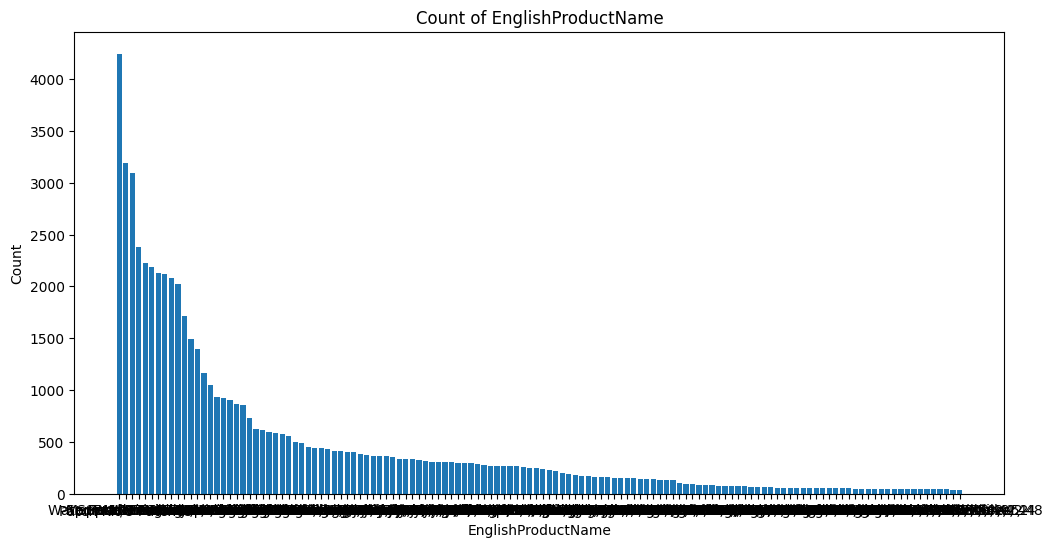

Count Table for MaritalStatus:
+-------------+-----+
|MaritalStatus|count|
+-------------+-----+
|            M|33273|
|            S|27125|
+-------------+-----+



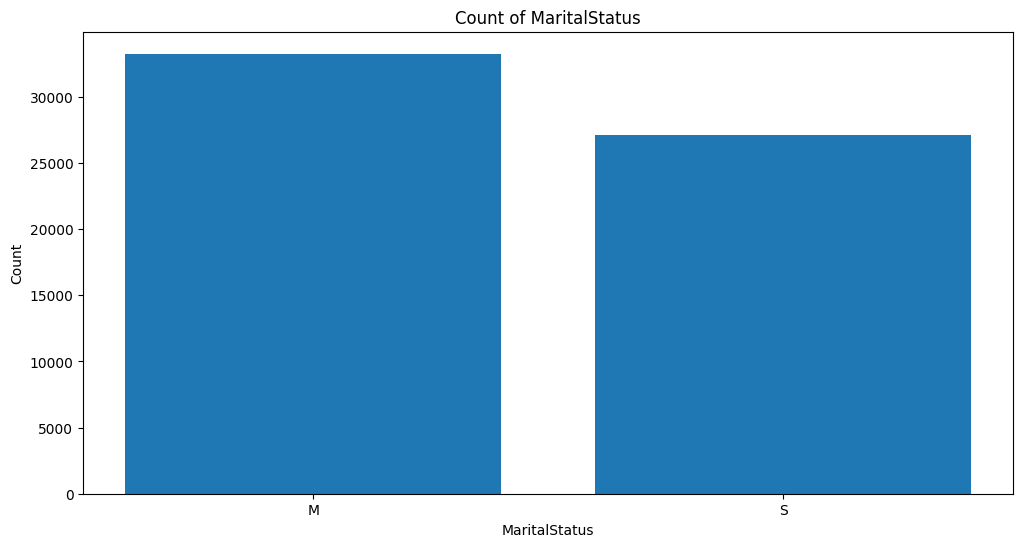

Count Table for Gender:
+------+-----+
|Gender|count|
+------+-----+
|     M|30381|
|     F|30017|
+------+-----+



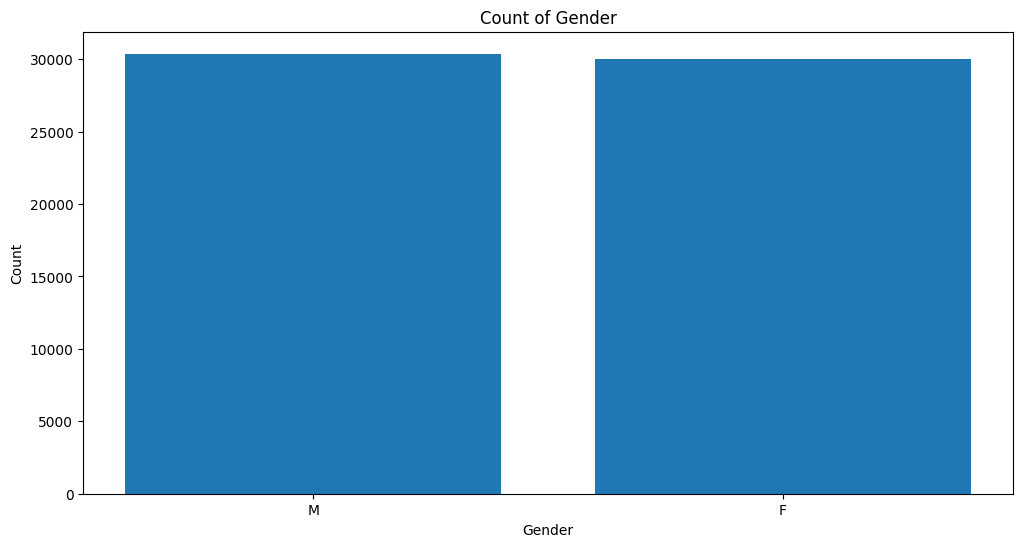

Count Table for TotalChildren:
+-------------+-----+
|TotalChildren|count|
+-------------+-----+
|            0|17048|
|            2|12285|
|            1|11561|
|            4| 7748|
|            3| 7061|
|            5| 4695|
+-------------+-----+



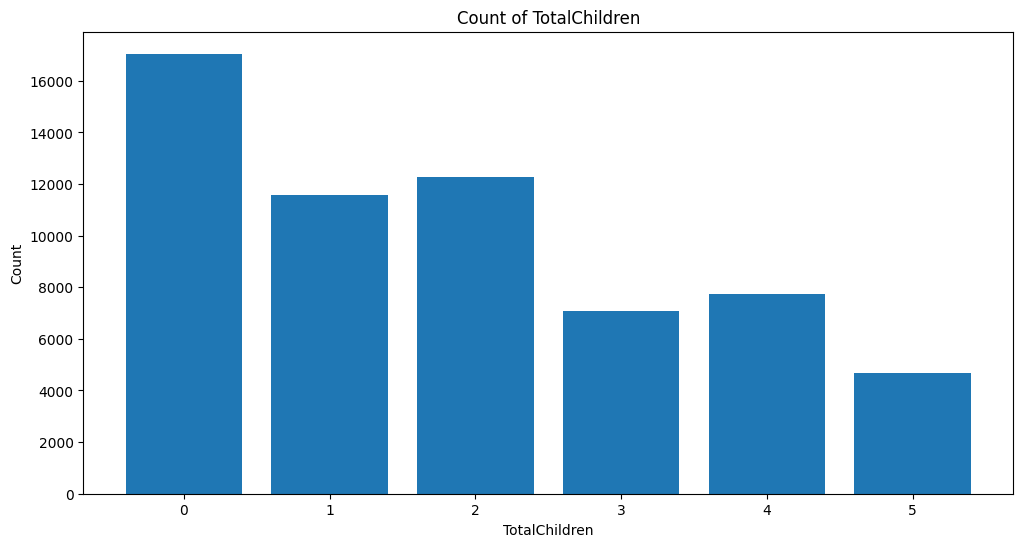

Count Table for NumberChildrenAtHome:
+--------------------+-----+
|NumberChildrenAtHome|count|
+--------------------+-----+
|                   0|35535|
|                   1| 7695|
|                   2| 5338|
|                   4| 4216|
|                   3| 4028|
|                   5| 3586|
+--------------------+-----+



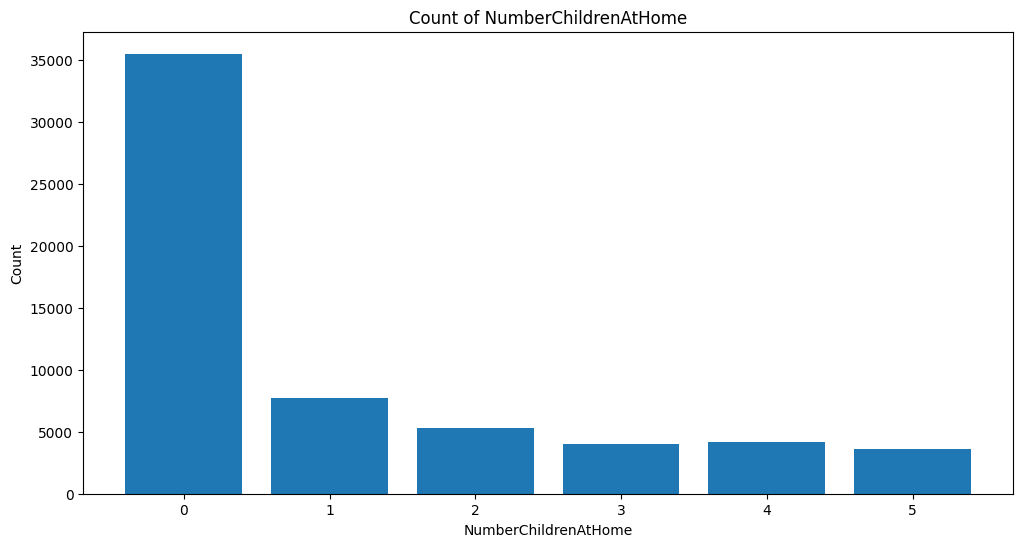

Count Table for CommuteDistance:
+---------------+-----+
|CommuteDistance|count|
+---------------+-----+
|      0-1 Miles|21307|
|     5-10 Miles|10615|
|      1-2 Miles|10170|
|      2-5 Miles|10084|
|      10+ Miles| 8222|
+---------------+-----+



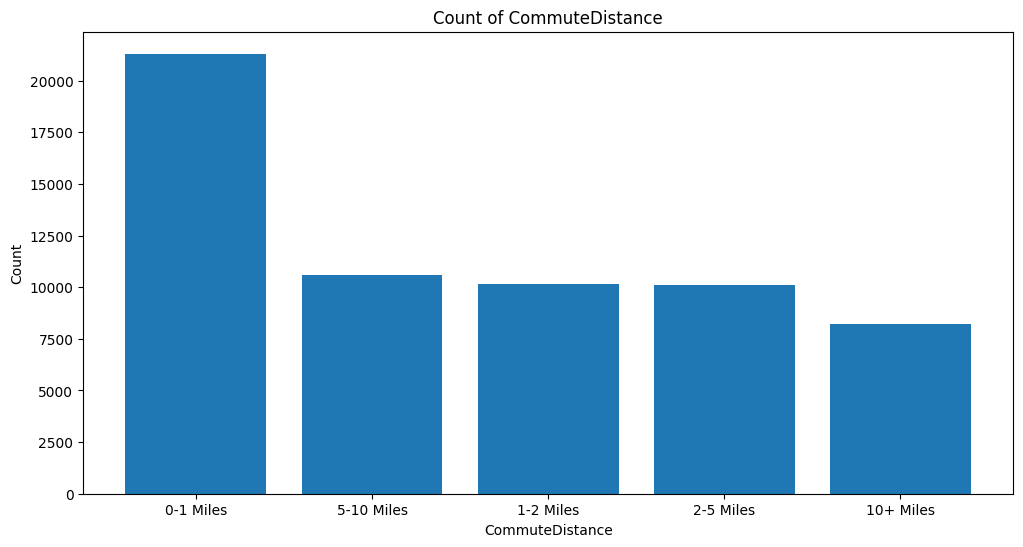

Count Table for EnglishEducation:
+-------------------+-----+
|   EnglishEducation|count|
+-------------------+-----+
|          Bachelors|18144|
|    Partial College|16623|
|    Graduate Degree|10603|
|        High School|10320|
|Partial High School| 4708|
+-------------------+-----+



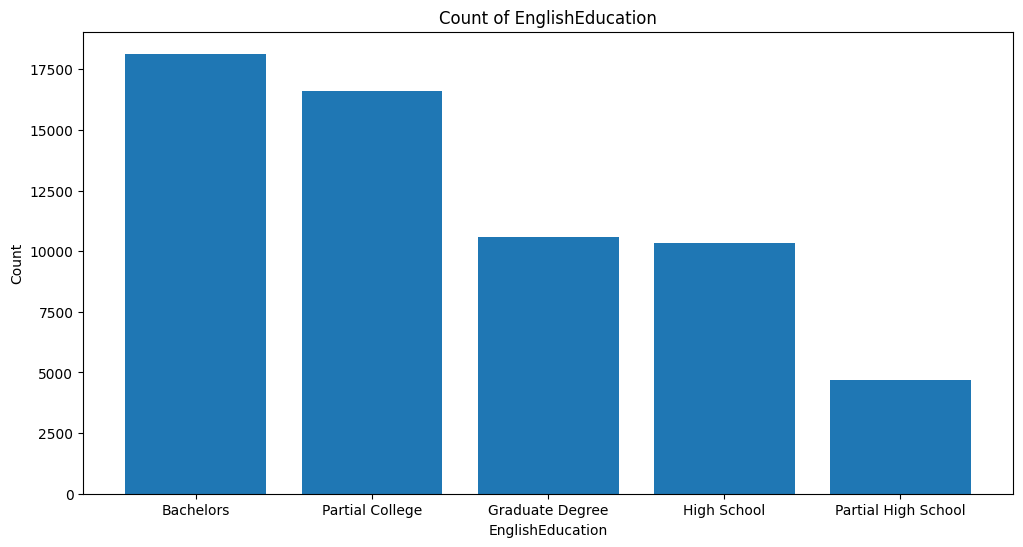

Count Table for HouseOwnerFlag:
+--------------+-----+
|HouseOwnerFlag|count|
+--------------+-----+
|             1|41699|
|             0|18699|
+--------------+-----+



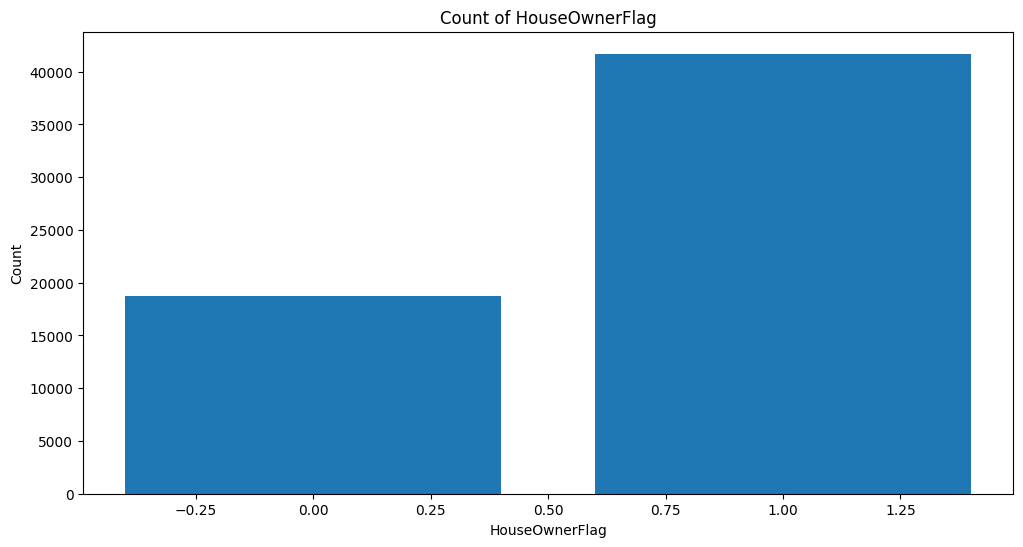

Count Table for NumberCarsOwned:
+---------------+-----+
|NumberCarsOwned|count|
+---------------+-----+
|              2|20522|
|              1|15812|
|              0|14068|
|              3| 5688|
|              4| 4308|
+---------------+-----+



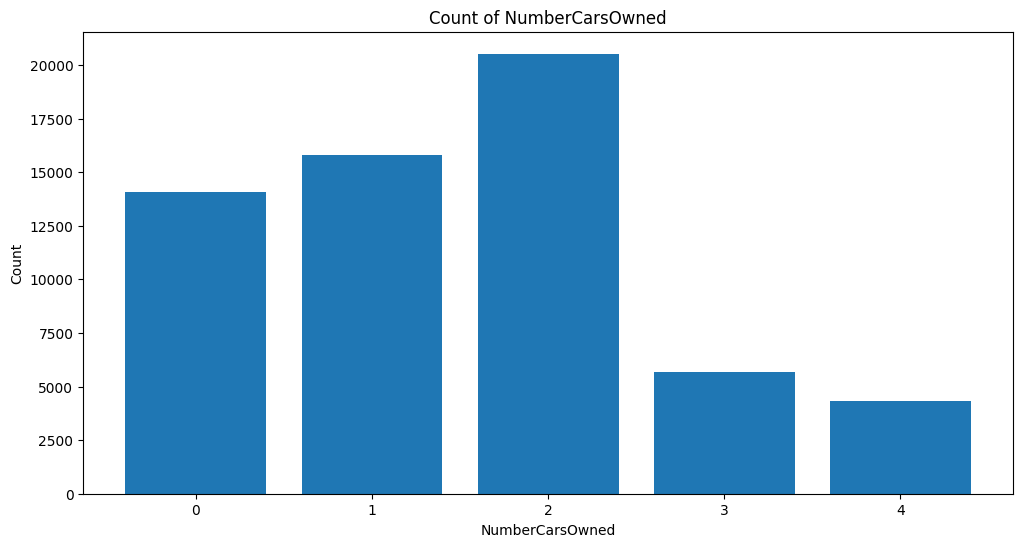

Count Table for EnglishPromotionName:
+--------------------+-----+
|EnglishPromotionName|count|
+--------------------+-----+
|         No Discount|58247|
|Volume Discount 1...| 2118|
|Touring-3000 Prom...|   20|
|Touring-1000 Prom...|   13|
+--------------------+-----+



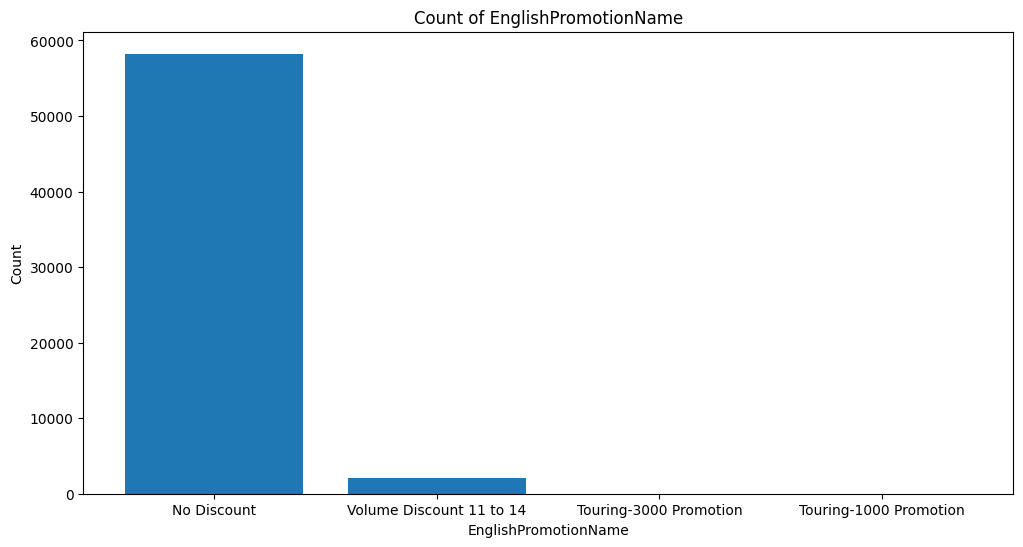

Count Table for CurrencyName:
+--------------------+-----+
|        CurrencyName|count|
+--------------------+-----+
|           US Dollar|33400|
|   Australian Dollar|12988|
|     Canadian Dollar| 7135|
|United Kingdom Pound| 6740|
|       Deutsche Mark|   76|
|        French Franc|   59|
+--------------------+-----+



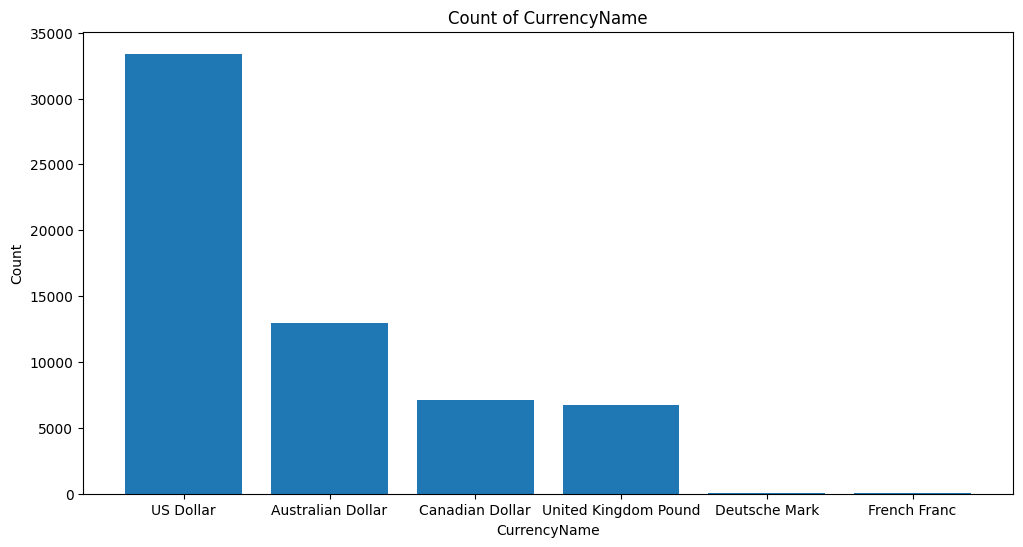

Count Table for SalesTerritoryRegion:
+--------------------+-----+
|SalesTerritoryRegion|count|
+--------------------+-----+
|           Australia|13345|
|           Southwest|12265|
|           Northwest| 8993|
|              Canada| 7620|
|      United Kingdom| 6906|
|             Germany| 5625|
|              France| 5558|
|           Southeast|   39|
|           Northeast|   27|
|             Central|   20|
+--------------------+-----+



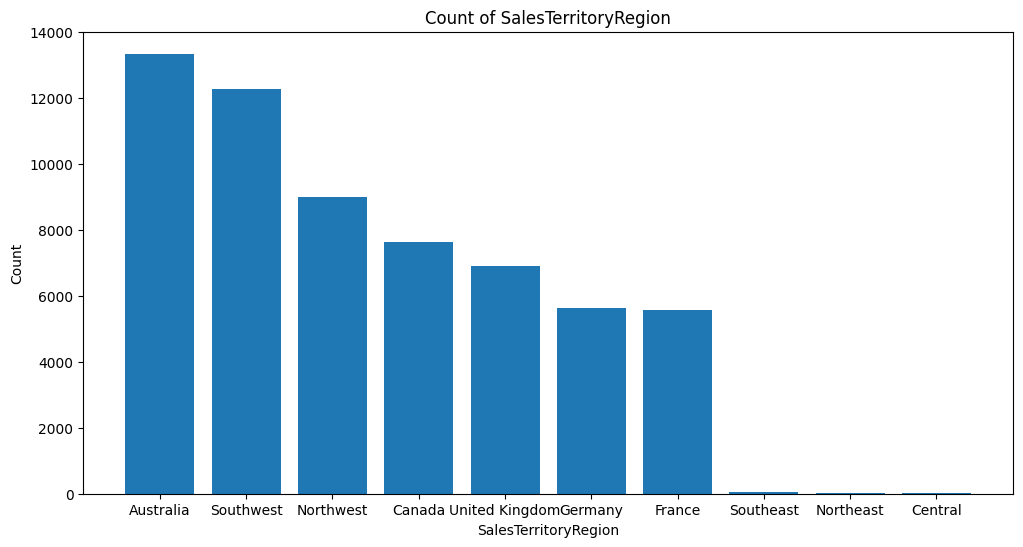

Count Table for SalesTerritoryCountry:
+---------------------+-----+
|SalesTerritoryCountry|count|
+---------------------+-----+
|        United States|21344|
|            Australia|13345|
|               Canada| 7620|
|       United Kingdom| 6906|
|              Germany| 5625|
|               France| 5558|
+---------------------+-----+



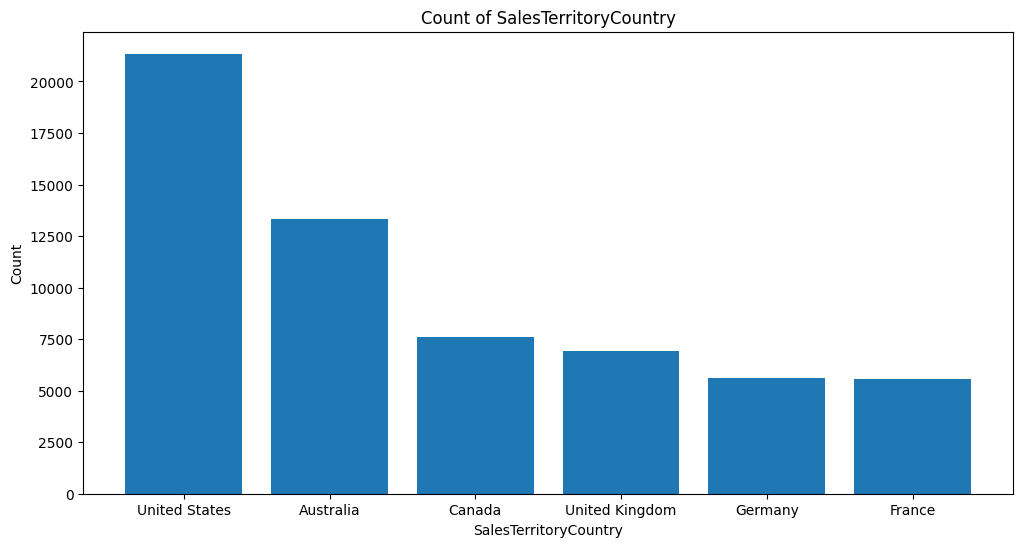

Count Table for SalesTerritoryGroup:
+-------------------+-----+
|SalesTerritoryGroup|count|
+-------------------+-----+
|      North America|28964|
|             Europe|18089|
|            Pacific|13345|
+-------------------+-----+



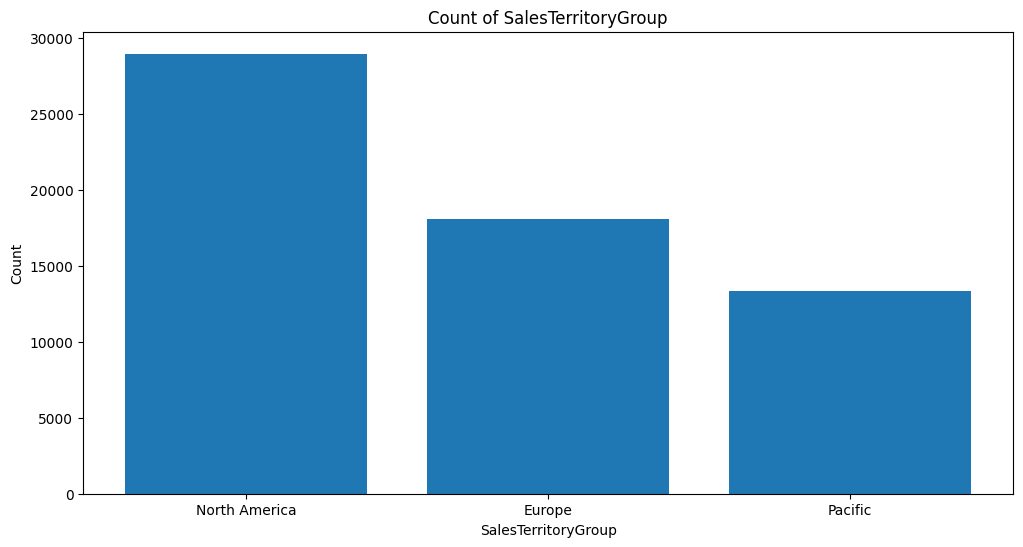

Count Table for StateProvinceName:
+-------------------+-----+
|  StateProvinceName|count|
+-------------------+-----+
|         California|12248|
|   British Columbia| 7584|
|            England| 6906|
|         Washington| 6101|
|    New South Wales| 5839|
|           Victoria| 3343|
|         Queensland| 2903|
|             Oregon| 2876|
|           Saarland| 1403|
|Nordrhein-Westfalen| 1257|
|             Hessen| 1210|
|      Seine (Paris)| 1174|
|            Hamburg|  926|
|    South Australia|  867|
|  Seine Saint Denis|  847|
|               Nord|  844|
|             Bayern|  729|
|     Hauts de Seine|  549|
|            Essonne|  505|
|            Yveline|  484|
+-------------------+-----+
only showing top 20 rows



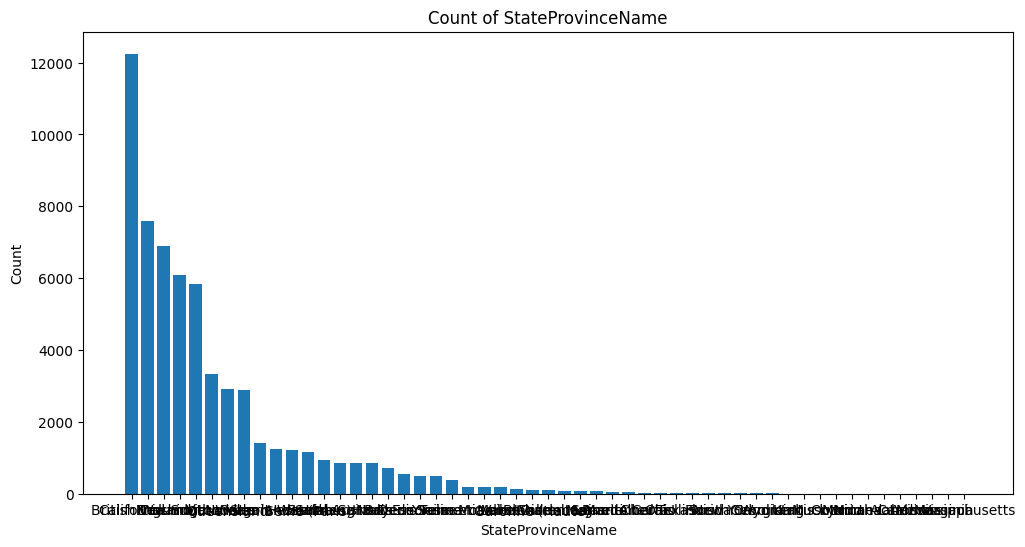

Count Table for EnglishCountryRegionName:
+------------------------+-----+
|EnglishCountryRegionName|count|
+------------------------+-----+
|           United States|21344|
|               Australia|13345|
|                  Canada| 7620|
|          United Kingdom| 6906|
|                 Germany| 5625|
|                  France| 5558|
+------------------------+-----+



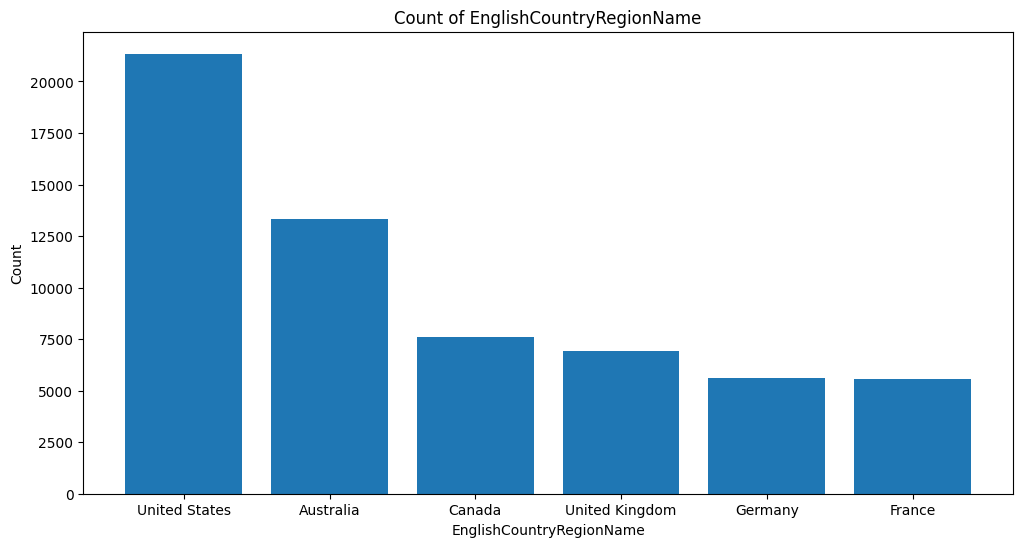

Count Table for City:
+-------------+-----+
|         City|count|
+-------------+-----+
|       London| 1579|
|        Paris| 1174|
|    Cliffside|  918|
|  Chula Vista|  583|
|       Berlin|  583|
|       Burien|  579|
|     Berkeley|  567|
|   Bellingham|  566|
|      Shawnee|  563|
|      Concord|  559|
| N. Vancouver|  552|
|    Beaverton|  547|
|   Bellflower|  537|
|   Burlingame|  535|
|      Burbank|  532|
|      Langley|  516|
|    Metchosin|  503|
| Port Hammond|  502|
|    Bremerton|  494|
|Beverly Hills|  485|
+-------------+-----+
only showing top 20 rows



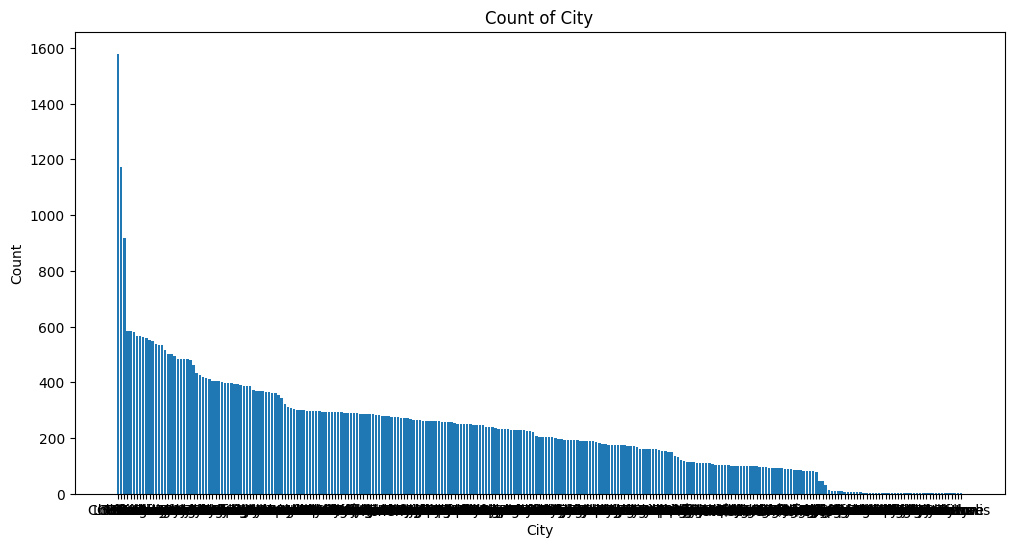

Count Table for OrderYear:
+---------+-----+
|OrderYear|count|
+---------+-----+
|     2013|52801|
|     2012| 3397|
|     2011| 2216|
|     2014| 1970|
|     2010|   14|
+---------+-----+



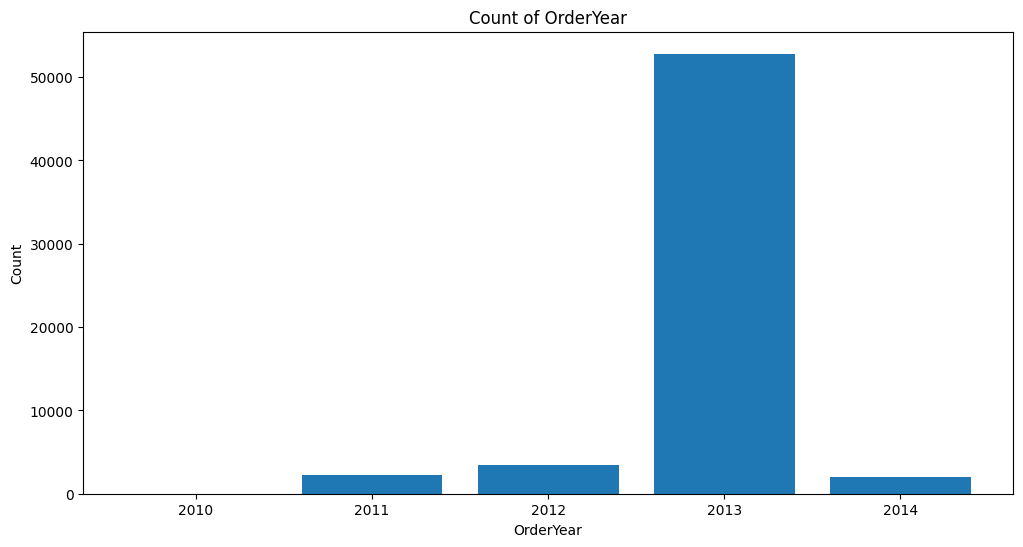

Count Table for OrderMonth:
+----------+-----+
|OrderMonth|count|
+----------+-----+
|        12| 6239|
|        10| 5834|
|        11| 5756|
|         6| 5573|
|         8| 5352|
|         7| 5105|
|         9| 5070|
|         5| 4780|
|         3| 4449|
|         4| 4355|
|         1| 4028|
|         2| 3857|
+----------+-----+



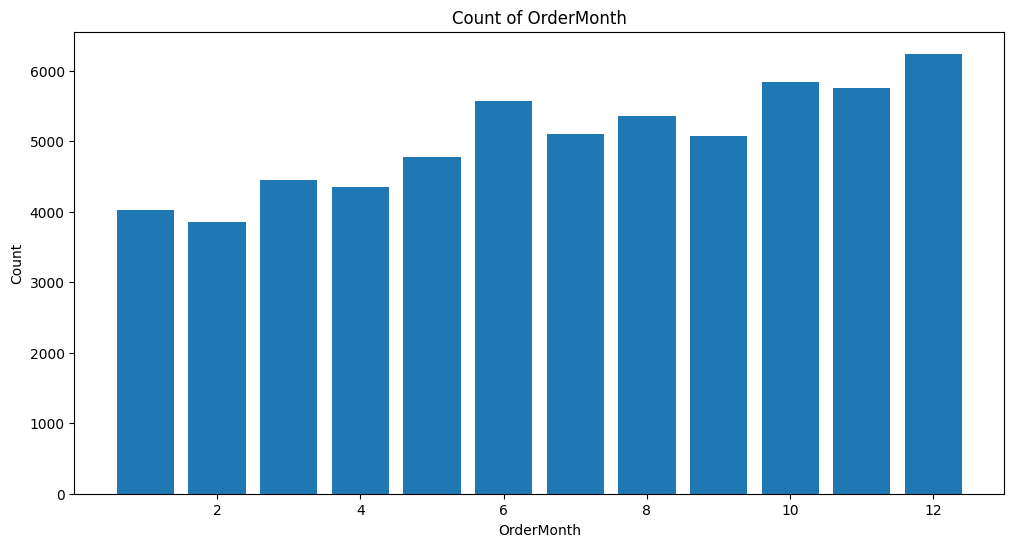

Count Table for DayOfWeek:
+---------+-----+
|DayOfWeek|count|
+---------+-----+
|        3| 8949|
|        2| 8732|
|        1| 8596|
|        4| 8585|
|        5| 8550|
|        6| 8504|
|        7| 8482|
+---------+-----+



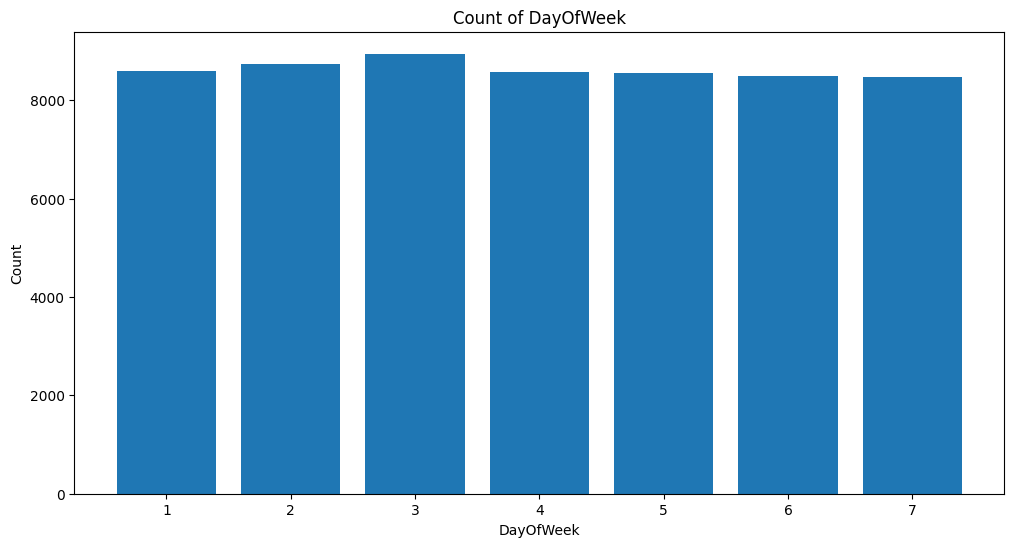

In [50]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt


# List of columns to consider
columns_of_interest = [
    'EnglishProductName', 'MaritalStatus', 'Gender', 'TotalChildren', 'NumberChildrenAtHome',
    'CommuteDistance', 'EnglishEducation', 'HouseOwnerFlag', 'NumberCarsOwned',
    'EnglishPromotionName', 'CurrencyName', 'SalesTerritoryRegion', 'SalesTerritoryCountry',
    'SalesTerritoryGroup', 'StateProvinceName', 'EnglishCountryRegionName', 'City',
    'OrderYear', 'OrderMonth', 'DayOfWeek'
]

# Create a count table and bar plot for each column
for column in columns_of_interest:
    # Count table
    count_table = joined_df.groupBy(column).count().orderBy('count', ascending=False)
    
    # Display count table
    print(f"Count Table for {column}:")
    count_table.show()

    # Convert the Spark DataFrame column to a Pandas DataFrame for plotting
    column_data = count_table.toPandas()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(column_data[column], column_data['count'])
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [52]:
joined_df.columns

['UnitPrice',
 'ExtendedAmount',
 'UnitPriceDiscountPct',
 'DiscountAmount',
 'ProductStandardCost',
 'TotalProductCost',
 'SalesAmount',
 'TaxAmt',
 'Freight',
 'EnglishProductName',
 'MaritalStatus',
 'Gender',
 'TotalChildren',
 'NumberChildrenAtHome',
 'CommuteDistance',
 'EnglishEducation',
 'HouseOwnerFlag',
 'NumberCarsOwned',
 'EnglishPromotionName',
 'CurrencyName',
 'SalesTerritoryRegion',
 'SalesTerritoryCountry',
 'SalesTerritoryGroup',
 'StateProvinceName',
 'EnglishCountryRegionName',
 'City',
 'OrderYear',
 'OrderMonth',
 'DayOfWeek',
 'BirthYear',
 'BirthMonth',
 'BirthDayOfWeek',
 'Age']


- **Age:** This column represents the different age groups for which the average unit price is calculated.

- **AverageUnitPrice:** This column shows the calculated average unit price for each corresponding age group. It is the mean value of the 'UnitPrice' column for each age group.

Insights:

1. **High Average Unit Prices:** Age groups 45, 58, 56, 60, and 89 have relatively higher average unit prices, indicating that products purchased by individuals in these age groups tend to be more expensive on average.

2. **Low Average Unit Prices:** Age groups 103, 91, 93, 96, and 87 have lower average unit prices, suggesting that products purchased by individuals in these age groups tend to be less expensive on average.

3. **Varied Spending Patterns:** The table reflects a wide range of average unit prices across different age groups, indicating diverse spending patterns among customers of different ages.

4. **Outliers:** Some age groups, such as 45, have notably high average unit prices, potentially indicating a preference for premium or luxury products in that age group.

5. **Age 104:** There is only one entry for age 104, and it has a relatively high average unit price. However, interpretations for such small sample sizes should be made cautiously.

These insights can be valuable for marketing and sales strategies, helping businesses understand the purchasing behavior of different age groups and tailor their offerings accordingly.

C:\Users\neste\AppData\Local\Temp\ipykernel_12344\2226578460.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='AverageUnitPrice', data=average_unit_price_by_age_pd, palette='viridis')


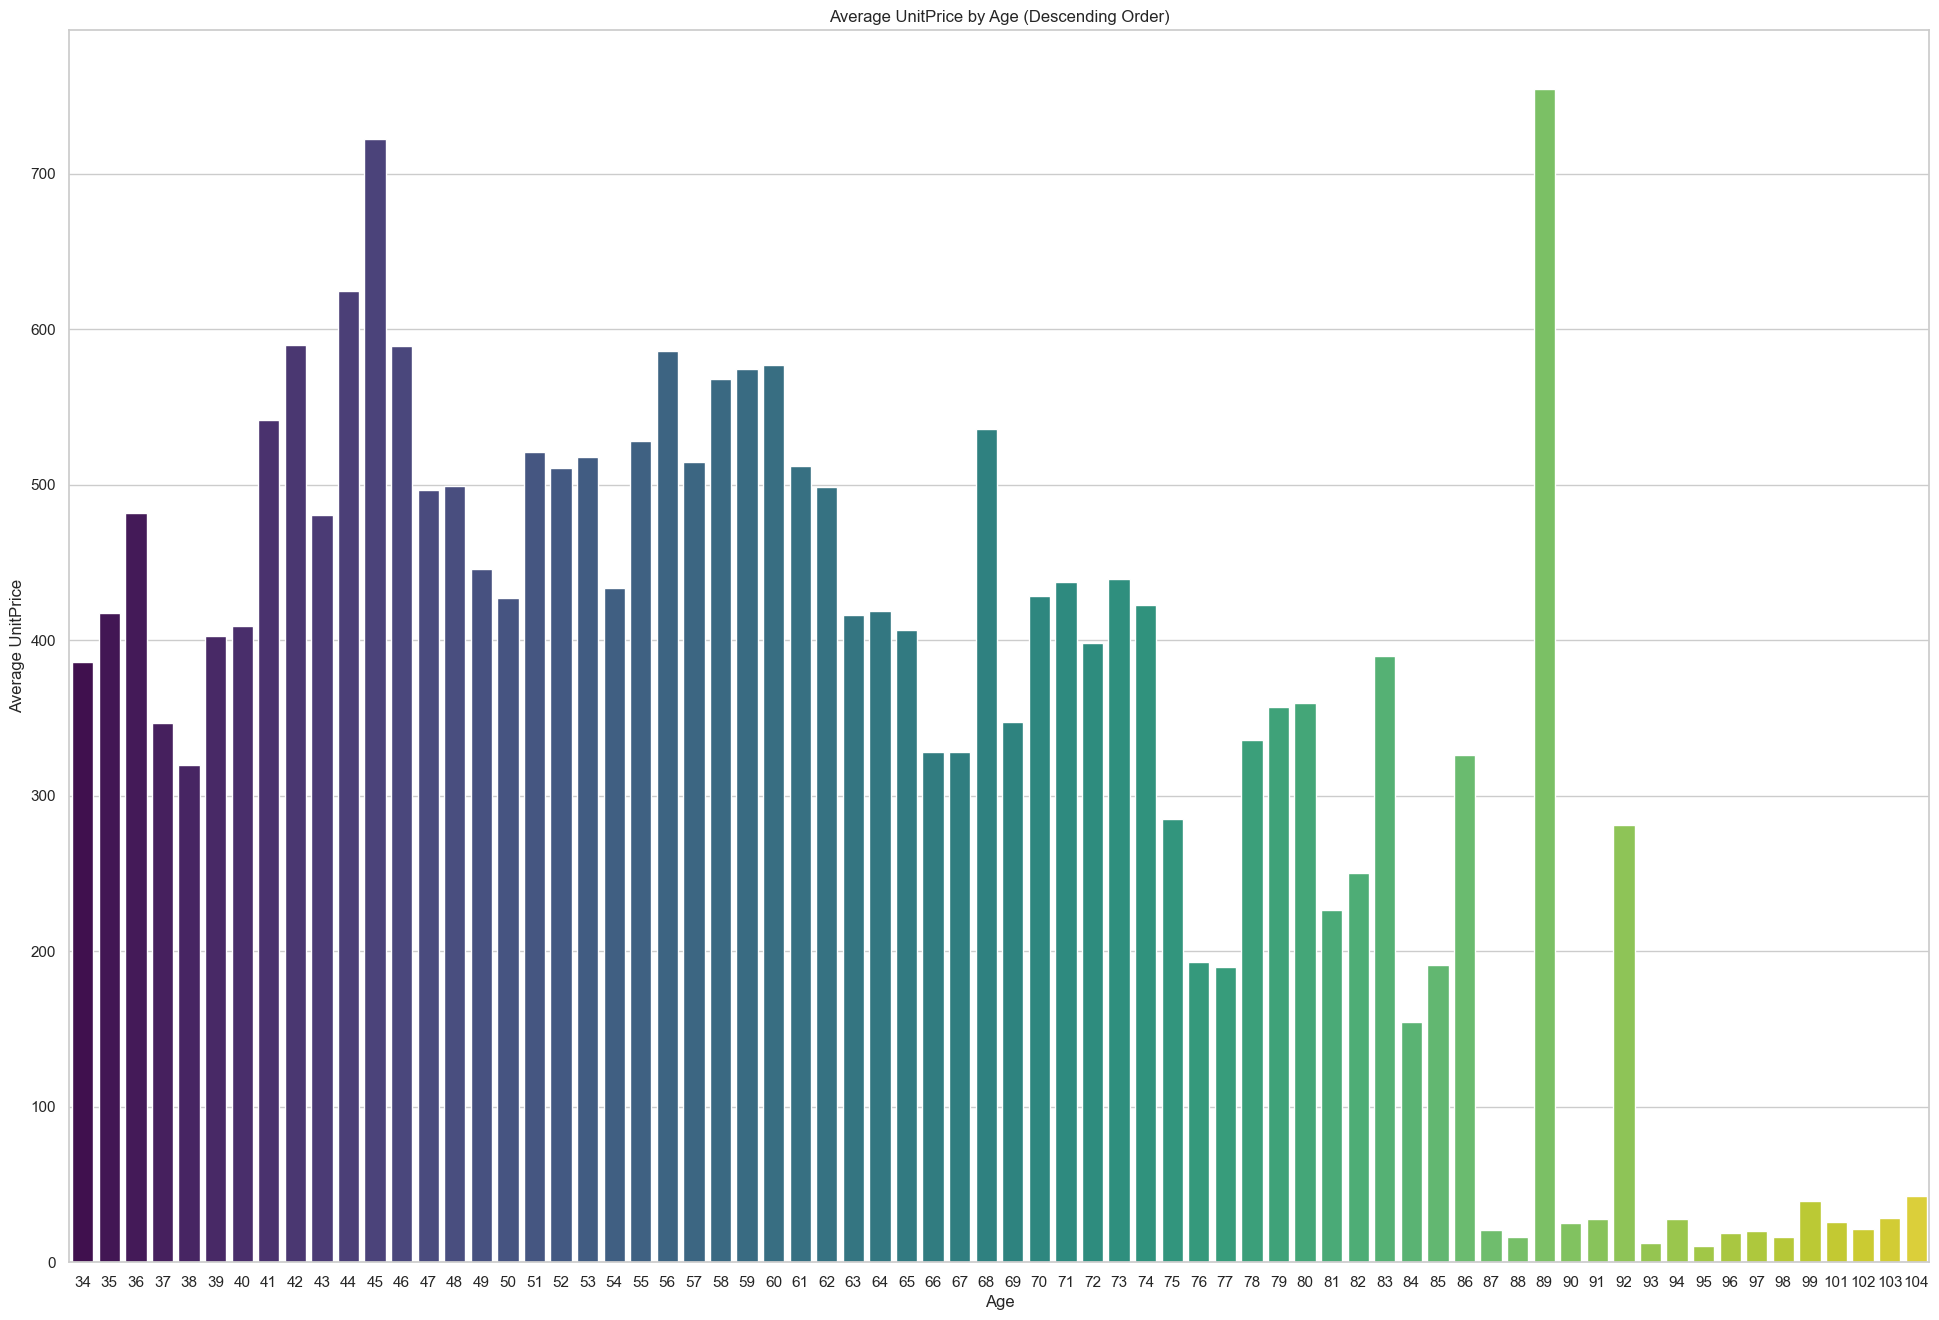

+---+------------------+
|Age|  AverageUnitPrice|
+---+------------------+
| 85| 190.8879999999999|
| 65|406.35837244444275|
| 53| 517.7053119314772|
| 78| 335.9244815686271|
| 34| 386.1799960317433|
| 81| 226.5060714285715|
| 76| 192.8731596330278|
| 44| 624.6079412542813|
|103|28.615000000000002|
| 91|           27.9875|
| 93|             12.32|
| 47| 496.5112788267588|
| 52|  510.783626357743|
| 86| 326.2350318181818|
| 40| 409.1315004895912|
| 94|          28.05375|
| 57| 514.7132711390966|
| 54| 433.3476178432418|
| 96|            19.052|
| 48| 498.9904602501058|
| 92| 281.2391666666667|
| 64|418.90866166328357|
| 41| 541.5896810841284|
| 43|480.78519149471015|
| 37|346.48675704407754|
| 61| 512.3932554716941|
| 88|         16.050625|
| 72|398.43324846938805|
| 35| 417.8126685185156|
| 59| 574.7171893847143|
| 55| 528.0614809051413|
| 39| 402.4521484162855|
| 49|  445.881251667467|
| 84|154.47441666666657|
| 87|20.627200000000002|
| 51| 520.9903661024648|
| 69|  347.419646020261|


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
from pyspark.sql.types import IntegerType



# Calculate the average UnitPrice by Age
average_unit_price_by_age = joined_df.groupBy("Age").agg(avg("UnitPrice").alias("AverageUnitPrice"))

# Cast 'Age' column to IntegerType
average_unit_price_by_age = average_unit_price_by_age.withColumn("Age", average_unit_price_by_age["Age"].cast(IntegerType()))

# Convert PySpark DataFrame to Pandas DataFrame
average_unit_price_by_age_pd = average_unit_price_by_age.toPandas()

# Sort the Pandas DataFrame by AverageUnitPrice in descending order
average_unit_price_by_age_pd = average_unit_price_by_age_pd.sort_values(by='AverageUnitPrice', ascending=False)

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(24, 16))
sns.barplot(x='Age', y='AverageUnitPrice', data=average_unit_price_by_age_pd, palette='viridis')
plt.title('Average UnitPrice by Age (Descending Order)')
plt.xlabel('Age')
plt.ylabel('Average UnitPrice')
plt.show()
# Display the table of the group by 'Age' and average unit price
average_unit_price_by_age.show(300)




- **EnglishProductName:** This column represents the names of different products.

- **AveragePrice:** This column represents the average price of each product.

The table is sorted in descending order based on the 'AveragePrice' column, meaning the products with the highest average price are listed first. Here are a few observations:

1. **Mountain-200 Black, 46:** This product has the highest average price, indicating that it is relatively expensive compared to other products.

2. **Touring-1000 Yellow, 46:** This product also has a high average price, making it one of the more expensive items.

3. **Touring-1000 Blue, 46:** Similar to the yellow variant, the blue version of the Touring-1000 has a high average price.

4. **Short-Sleeve Classic Jersey, M:** This is an example of a product with a lower average price.

5. **Women's Mountain Shorts, M:** Another product with a relatively lower average price.

The table provides insights into the pricing distribution across different product categories, helping you identify products with varying price points.

+--------------------+------------------+
|  EnglishProductName|      AveragePrice|
+--------------------+------------------+
|Mountain-200 Blac...|2220.1011293159568|
|Touring-1000 Yell...|2384.0700000000043|
|Touring-1000 Blue...|2384.0700000000043|
|Short-Sleeve Clas...|53.989999999999824|
|Women's Mountain ...| 69.98999999999984|
|Long-Sleeve Logo ...| 49.98999999999983|
|Mountain-400-W Si...| 769.4899999999998|
|     Racing Socks, M| 8.990000000000007|
|Mountain-100 Silv...| 3399.990000000001|
|Mountain-200 Silv...| 2245.418879999995|
|  Road-750 Black, 58| 539.9900000000009|
|Half-Finger Glove...| 24.48999999999988|
|Road-350-W Yellow...|1700.9899999999989|
|Mountain-400-W Si...| 769.4899999999997|
|Mountain-100 Silv...|           3399.99|
|Mountain Bottle Cage|  9.98999999999984|
|Touring-1000 Blue...|2384.0700000000047|
|Mountain-500 Silv...| 564.9899999999999|
|    HL Mountain Tire|              35.0|
|Mountain-400-W Si...| 769.4899999999998|
|Bike Wash - Disso...|  7.94999999

C:\Users\neste\AppData\Local\Temp\ipykernel_12344\3826689957.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AveragePrice', y='EnglishProductName', data=average_price_by_product_pd, palette='viridis')


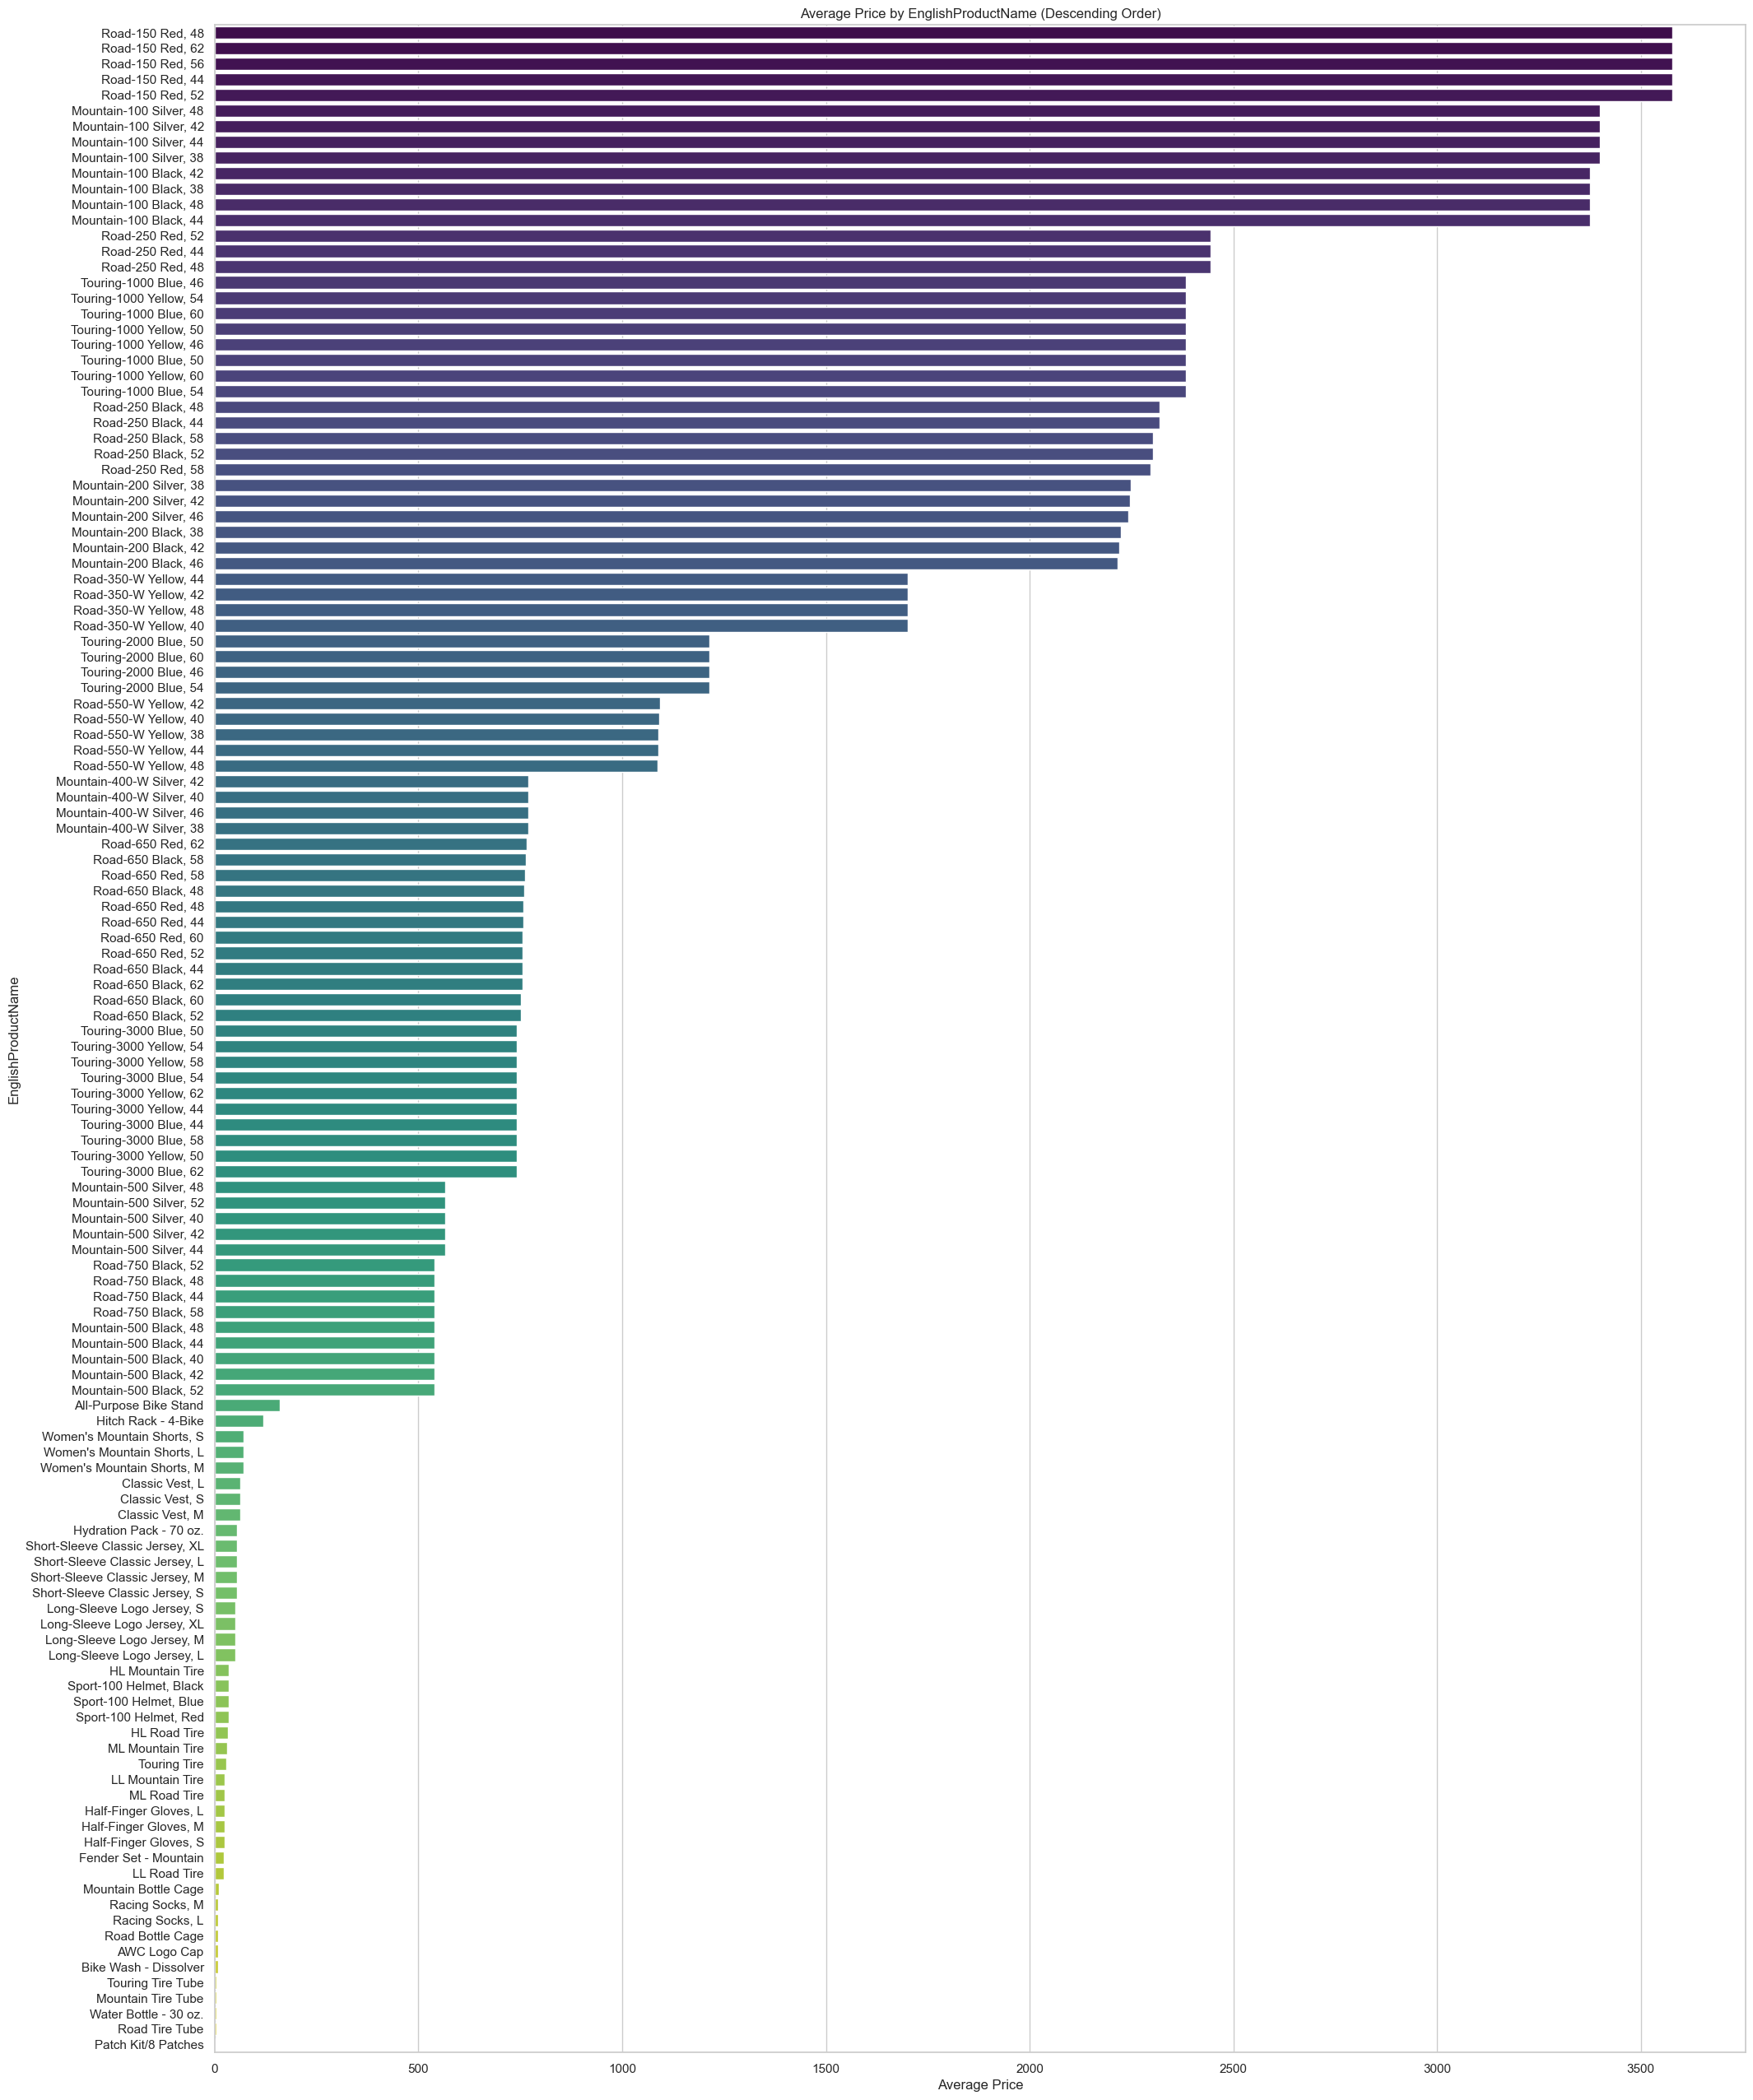

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg


# Calculate the average price by 'EnglishProductName'
average_price_by_product = joined_df.groupBy("EnglishProductName").agg(avg("UnitPrice").alias("AveragePrice"))
average_price_by_product.show(300)
# Convert PySpark DataFrame to Pandas DataFrame
average_price_by_product_pd = average_price_by_product.toPandas()

# Sort the Pandas DataFrame by AveragePrice in descending order
average_price_by_product_pd = average_price_by_product_pd.sort_values(by='AveragePrice', ascending=False)

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(24, 32))
sns.barplot(x='AveragePrice', y='EnglishProductName', data=average_price_by_product_pd, palette='viridis')
plt.title('Average Price by EnglishProductName (Descending Order)')
plt.xlabel('Average Price')
plt.ylabel('EnglishProductName')
plt.show()
